In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_labels = pd.read_csv('../datasets/train_labels.csv')

In [3]:
train_values = pd.read_csv('../datasets/train_values.csv')

In [4]:
numero_pisos = train_values[['building_id','count_floors_pre_eq']]

In [5]:
numero_pisos = train_labels.merge(numero_pisos, how='inner').\
 rename(columns={'count_floors_pre_eq':'Número de pisos'})

In [6]:
grado_danio_segun_numero_pisos = numero_pisos.groupby(['Número de pisos','damage_grade'])\
    .agg('count')

In [7]:
grado_danio_segun_numero_pisos = grado_danio_segun_numero_pisos.reset_index().\
 pivot(index='Número de pisos', columns='damage_grade',values='building_id').fillna(0)

In [8]:
grado_danio_segun_numero_pisos

damage_grade,1,2,3
Número de pisos,,,
1,8969.0,20798.0,10674.0
2,12593.0,93968.0,50062.0
3,2537.0,28479.0,24601.0
4,707.0,3374.0,1343.0
5,254.0,1481.0,511.0
6,53.0,133.0,23.0
7,10.0,25.0,4.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


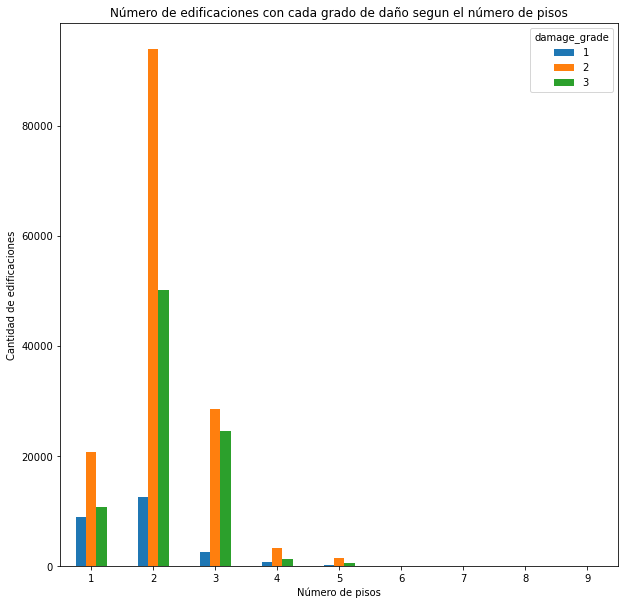

In [9]:
grado_danio_segun_numero_pisos.plot(kind='bar',figsize=(10,10),\
                                    rot=0,title='Número de edificaciones con cada grado de daño segun el número de pisos')
ax=plt.gca()
ax.set_xlabel('Número de pisos')
ax.set_ylabel('Cantidad de edificaciones');